In [ ]:
# mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lay base url cho data folder
data_folder_url = "/content/drive/MyDrive/Education_dataset_V2/"

In [ ]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lấy 2 file data gồm dữ liệu sinh viên và kết quả học tập anh văn của sinh viên
df_sinhvien = pd.read_excel(data_folder_url + "01.sinhvien.xlsx")
df_anhvan = pd.read_excel(data_folder_url + "04.xeploaiav.xlsx")

In [ ]:
#Có tổng 8295 sinh viên trong bảng sinh viên
df_sinhvien.nunique()

,0
id,8295
mssv,8294
namsinh,18
gioitinh,2
noisinh,231
...,...
_52,1
_53,1
_54,1
_55,1


In [ ]:
#Có 6343 mã sinh viên trong bảng anh văn
df_anhvan.nunique()

,0
id,6343
mssv,6343
listening,51
reading,66
total,204
mamh,13
ghichu,5


In [ ]:
# Merge mode inner để chọn ra những sinh viên có học anh văn trong trường
merged_df = pd.merge(df_sinhvien, df_anhvan, on='mssv', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_x            4924 non-null   float64
 1   mssv            4918 non-null   object 
 2    namsinh        4924 non-null   float64
 3    gioitinh       4924 non-null   float64
 4    noisinh        4924 non-null   object 
 5    lopsh          4924 non-null   object 
 6    khoa           4924 non-null   object 
 7    hedt           4924 non-null   object 
 8    khoahoc        4924 non-null   float64
 9    chuyennganh2   4924 non-null   object 
 10   tinhtrang      4924 non-null   float64
 11   diachi_tinhtp  4924 non-null   object 
 12  Column1         1004 non-null   object 
 13  _1              653 non-null    object 
 14  _2              417 non-null    object 
 15  _3              246 non-null    object 
 16  _4              136 non-null    object 
 17  _5              82 non-null     o

In [ ]:
#Chỉ có 4919 mẫu là còn lại trong bảng merge, có thể là thời kì lấy ra 2 bảng là khác nhau nên số sinh viên không trùng khớp
#Nếu đúng thì phải 6343 mã sinh viên
merged_df.nunique()

,0
id_x,4919
mssv,4918
namsinh,12
gioitinh,2
noisinh,148
...,...
listening,51
reading,66
total,204
mamh,13


In [ ]:
#Chọn ra các cột cần thiết cho khảo sát
surveyed_df = merged_df[['mssv',' namsinh',' gioitinh',' noisinh',' lopsh',' khoa',' hedt',' khoahoc',' chuyennganh2',' tinhtrang',' diachi_tinhtp',' listening',' reading',' total',' mamh',' ghichu']]


In [ ]:
surveyed_df.nunique()

,0
mssv,4918
namsinh,12
gioitinh,2
noisinh,148
lopsh,109
khoa,6
hedt,5
khoahoc,6
chuyennganh2,12
tinhtrang,7


# KHÁM PHÁ DỮ LIỆU

1.   **Thống kê mô tả(Văn Duy)**
2.   **Trực quan hóa dữ liệu(Quang Đăng)**
3.   **Xử lí dữ liệu(Lộc)**
4.   **Phân tích thống kê(Văn Duy)**
5.   **Khai phá tri thức(Hoài Bảo)**





### ***THỐNG KÊ MÔ TẢ***

In [ ]:
surveyed_df.loc[:, ' reading'] = pd.to_numeric(surveyed_df[' reading'], errors='coerce')
reading_mean = surveyed_df[' reading'].mean()
reading_median = surveyed_df[' reading'].median()
reading_std = surveyed_df[' reading'].std()
reading_percentile = surveyed_df[' reading'].quantile([0.25, 0.5, 0.75]).to_dict()
(reading_mean, reading_median, reading_std, reading_percentile)

(34.72421052631579,
 33.0,
 12.133879790747143,
 {0.25: 26.0, 0.5: 33.0, 0.75: 43.0})

In [ ]:
surveyed_df.loc[:, ' listening'] = pd.to_numeric(surveyed_df[' listening'], errors='coerce')
listening_mean = surveyed_df[' listening'].mean()
listening_median = surveyed_df[' listening'].median()
listening_std = surveyed_df[' listening'].std()
listening_percentile = surveyed_df[' listening'].quantile([0.25, 0.5, 0.75]).to_dict()
(listening_mean, listening_median, listening_std, listening_percentile)

(27.02140350877193,
 26.0,
 9.585983654302584,
 {0.25: 19.0, 0.5: 26.0, 0.75: 34.0})

In [ ]:
surveyed_df.loc[:, ' total'] = pd.to_numeric(surveyed_df[' total'], errors='coerce')
total_mean = surveyed_df[' total'].mean()
total_median = surveyed_df[' total'].median()
total_std = surveyed_df[' total'].std()
total_percentile = surveyed_df[' total'].quantile([0.25, 0.5, 0.75]).to_dict()
(total_mean, total_median, total_std, total_percentile)

(135.5982106547377,
 66.0,
 136.11890660244765,
 {0.25: 43.0, 0.5: 66.0, 0.75: 220.0})

### ***TRỰC QUAN HÓA DỮ LIỆU***

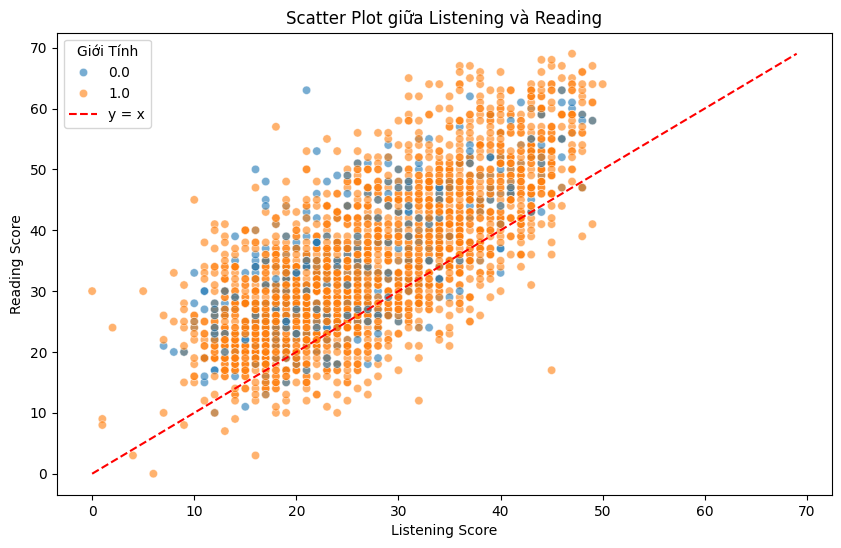

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=surveyed_df, x=' listening', y=' reading', hue=' gioitinh', alpha=0.6)

max_val = max(surveyed_df[' listening'].max(), surveyed_df[' reading'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='y = x')

plt.title('Scatter Plot giữa Listening và Reading')
plt.xlabel('Listening Score')
plt.ylabel('Reading Score')
plt.legend(title='Giới Tính')
plt.show()

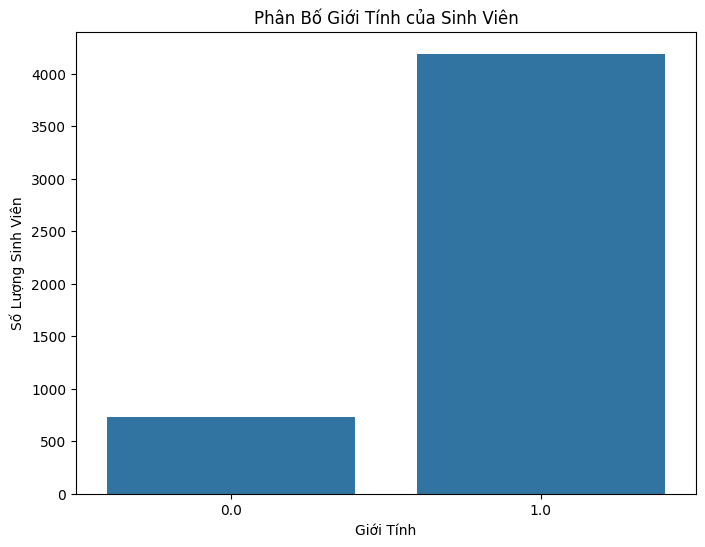

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=surveyed_df, x=' gioitinh')
plt.title('Phân Bố Giới Tính của Sinh Viên')
plt.xlabel('Giới Tính')
plt.ylabel('Số Lượng Sinh Viên')
plt.show()

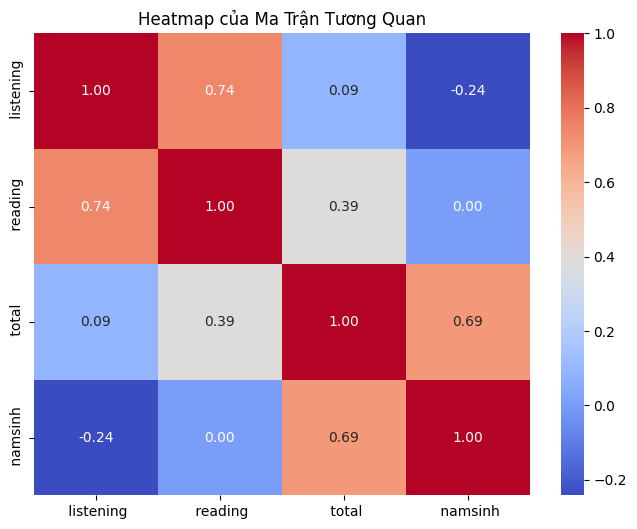

In [ ]:
numeric_cols = [' listening', ' reading', ' total', ' namsinh']

corr_matrix = surveyed_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap của Ma Trận Tương Quan')
plt.show()

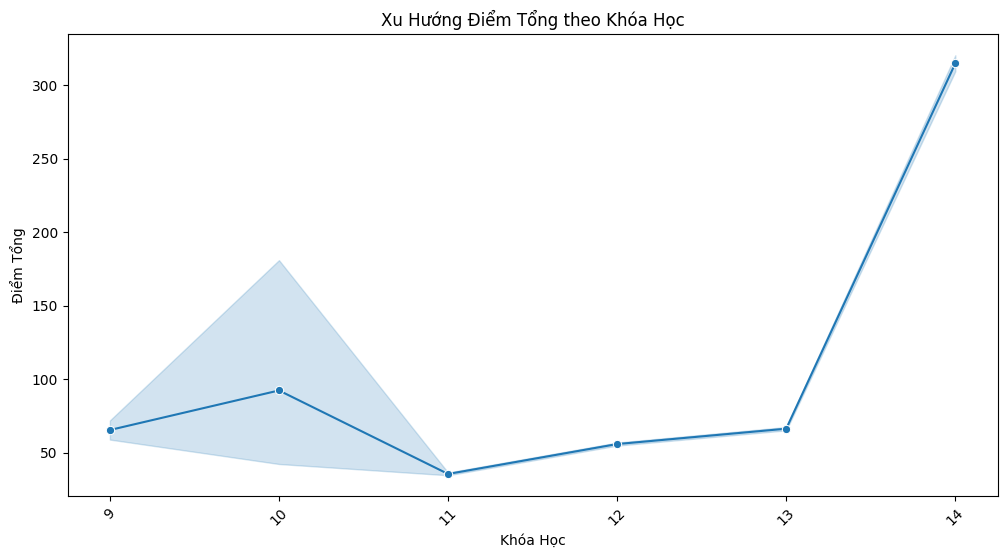

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=surveyed_df, x=' khoahoc', y=' total', marker='o')
plt.title('Xu Hướng Điểm Tổng theo Khóa Học')
plt.xlabel('Khóa Học')
plt.ylabel('Điểm Tổng')
plt.xticks(rotation=45)
plt.show()

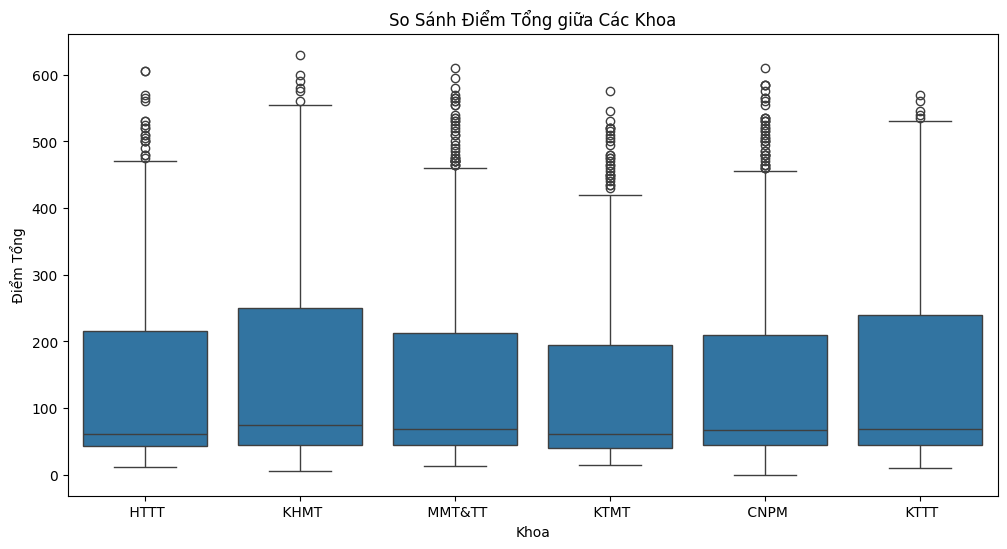

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=surveyed_df, x=' khoa', y=' total')
plt.title('So Sánh Điểm Tổng giữa Các Khoa')
plt.xlabel('Khoa')
plt.ylabel('Điểm Tổng')
plt.show()

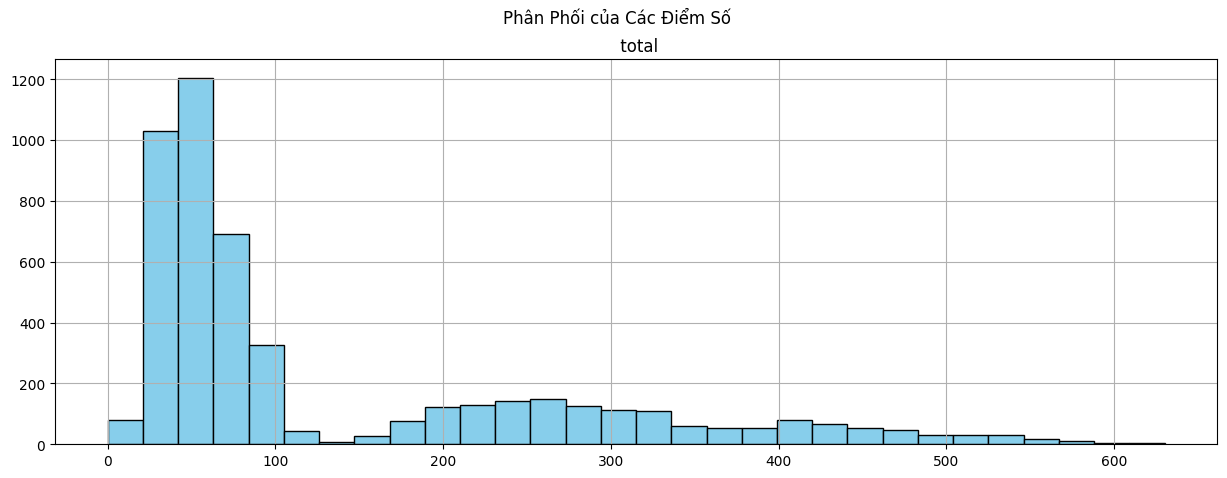

In [ ]:
surveyed_df[[' listening', ' reading', ' total']].hist(bins=30, figsize=(15, 5), color='skyblue', edgecolor='black')
plt.suptitle('Phân Phối của Các Điểm Số')
plt.show()

### ***XỬ LÍ DỮ LIỆU***

### Xử lí dữ liệu thiếu

In [ ]:
#Đổi các string "NULL" thành pd.NA
#Chỗ này oái oăm ở chỗ nó không phải là 'NULL' mà là ' NULL'
surveyed_df.replace(' NULL', pd.NA, inplace=True)
print(f"Total records of dataset: {len(surveyed_df)}")

Total records of dataset: 5050


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-68300e165f77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surveyed_df.replace(' NULL', pd.NA, inplace=True)


In [ ]:
#Khám phá các dữ liệu nào hiện đang thiếu
#Toàn mẫu có 5045 tuy nhiên cột 'ghichu' có 3000+ mẫu dữ liệu có NULL, ngoài ra qua khám phá nhóm còn thấy có mốt sô trường NULL:) nên hàm replace ở trên chưa xử lí đoạn này
#nhận thấy cột ghi chú không có liên quan đến thành tích điểm số, nên nhóm quyết định bỏ cột này trước khi drop null
#mục đích của việc làm này là giữ lại nhiều rows nhất có thể
missing_values = surveyed_df.isnull().sum()
missing_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
mssv,132
namsinh,126
gioitinh,126
noisinh,126
lopsh,126
khoa,126
hedt,126
khoahoc,126
chuyennganh2,126
tinhtrang,126


In [ ]:
#Thực hiện drop cột "ghi chu"
surveyed_df.drop(columns = [' ghichu'], inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-74ae1f9ee252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surveyed_df.drop(columns = [' ghichu'], inplace = True)


In [ ]:
#Thực hiện bỏ các records có các bảng ghi chứa null value
surveyed_df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-6ea30bc470f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surveyed_df.dropna(inplace=True)


In [ ]:
surveyed_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
mssv,0
namsinh,0
gioitinh,0
noisinh,0
lopsh,0
khoa,0
hedt,0
khoahoc,0
chuyennganh2,0
tinhtrang,0


In [ ]:
#in ra tổng số records còn lại sau khi bỏ null
print(f"Total records of dataset after drop record that have null value: {len(surveyed_df)}")

Total records of dataset after drop record that have null value: 2850


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Kiểm tra các dòng trùng lặp
# Ta thấy không có dòng nào chứa dữ liệu trùng lặp
duplicates = surveyed_df[surveyed_df.duplicated()]

print("Các dòng trùng lặp là:\n", duplicates)

Các dòng trùng lặp là:
 Empty DataFrame
Columns: [mssv,  namsinh,  gioitinh,  noisinh,  lopsh,  khoa,  hedt,  khoahoc,  chuyennganh2,  tinhtrang,  diachi_tinhtp,  listening,  reading,  total,  mamh]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
surveyed_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang,diachi_tinhtp,listening,reading,total,mamh
0,C0C9C20EXPvAibaEXe/y2t7DVG8TDRg2y/nF6frs,1996.0,1.0,'Đồng Nai',HTTT0001,HTTT,CQUI,9.0,D480104,8.0,'Thành phố Biên Hòa',39,33,72.0,ENG02
1,E44D1E6CXPvAibaEXe/k62DFAfrQTsS8tHO2IoFl,1996.0,1.0,'Bình Định',KHMT0001,KHMT,CQUI,9.0,D480101,8.0,'Tỉnh Bình Định',32,27,59.0,AVSC2
2,AECDA517XPvAibaEXe9Z0fDyfUkzH0z69+UCjYo/,1996.0,1.0,'Đắk Lắk',KHMT0001,KHMT,CQUI,10.0,D480101,2.0,'Huyện Ea Kar',23,26,49.0,AVSC1
4,B283D9D3XPvAibaEXe+A+6mRsShfH4YVS3iOxjbV,1997.0,1.0,'An Giang',MTCL2015.2,KTMT,CLC,10.0,D520214,5.0,'Quận Thốt Nốt',28,27,55.0,AVSC2
5,6BF47AC8XPvAibaEXe+BUGeEgVnB4JyRonENPufx,1997.0,1.0,'Đồng Nai',KTMT0001,KTMT,CLC,10.0,D520214,5.0,'Tỉnh Đồng Nai',32,29,61.0,ENG01


### Xử lí dữ liệu nhiễu

In [ ]:
surveyed_df.describe()

,namsinh,gioitinh,khoahoc,tinhtrang,total
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,2000.453333,0.838596,13.523860,1.312281,200.880000
std,0.691495,0.367967,0.553516,0.998080,146.981682
min,1992.000000,0.000000,9.000000,1.000000,6.000000
25%,2000.000000,1.000000,13.000000,1.000000,67.000000
50%,2001.000000,1.000000,14.000000,1.000000,190.000000
75%,2001.000000,1.000000,14.000000,1.000000,305.000000
max,2001.000000,1.000000,14.000000,8.000000,630.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


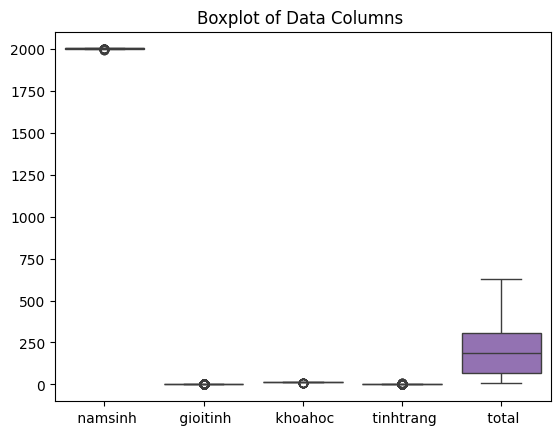

In [ ]:
# Vẽ boxplot cho tất cả các cột trong DataFrame
# ta thấy năm sinh và total có nhiều dữ liệu ngoại lai, tuy nhiên năm sinh chúng ta không thể đổi vì đó là thông tin cá nhân
# còn cột total được tích từ các điểm thành phần, có vẻ như cũng không đổi được
sns.boxplot(data=surveyed_df)
plt.title('Boxplot of Data Columns ')
plt.show()


### Xử lí dữ liệu không nhất quán

In [ ]:
surveyed_df.dtypes

,0
mssv,object
namsinh,float64
gioitinh,float64
noisinh,object
lopsh,object
khoa,object
hedt,object
khoahoc,float64
chuyennganh2,object
tinhtrang,float64


In [ ]:
surveyed_df.head()

,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang,diachi_tinhtp,listening,reading,total,mamh
0,C0C9C20EXPvAibaEXe/y2t7DVG8TDRg2y/nF6frs,1996.0,1.0,'Đồng Nai',HTTT0001,HTTT,CQUI,9.0,D480104,8.0,'Thành phố Biên Hòa',39,33,72.0,ENG02
1,E44D1E6CXPvAibaEXe/k62DFAfrQTsS8tHO2IoFl,1996.0,1.0,'Bình Định',KHMT0001,KHMT,CQUI,9.0,D480101,8.0,'Tỉnh Bình Định',32,27,59.0,AVSC2
2,AECDA517XPvAibaEXe9Z0fDyfUkzH0z69+UCjYo/,1996.0,1.0,'Đắk Lắk',KHMT0001,KHMT,CQUI,10.0,D480101,2.0,'Huyện Ea Kar',23,26,49.0,AVSC1
4,B283D9D3XPvAibaEXe+A+6mRsShfH4YVS3iOxjbV,1997.0,1.0,'An Giang',MTCL2015.2,KTMT,CLC,10.0,D520214,5.0,'Quận Thốt Nốt',28,27,55.0,AVSC2
5,6BF47AC8XPvAibaEXe+BUGeEgVnB4JyRonENPufx,1997.0,1.0,'Đồng Nai',KTMT0001,KTMT,CLC,10.0,D520214,5.0,'Tỉnh Đồng Nai',32,29,61.0,ENG01


In [ ]:
# chuyển mssv thành string
# Chuyển các thuộc tính điểm thành dạng số
surveyed_df['mssv'] = surveyed_df['mssv'].astype(str)
surveyed_df[' listening']= pd.to_numeric(surveyed_df[' listening'], errors='coerce')
surveyed_df[' reading']= pd.to_numeric(surveyed_df[' reading'], errors='coerce')
surveyed_df[' total']= surveyed_df[' total'].astype(float)

<ipython-input-56-d84eadc53bf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surveyed_df['mssv'] = surveyed_df['mssv'].astype(str)
<ipython-input-56-d84eadc53bf2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surveyed_df[' listening']= pd.to_numeric(surveyed_df[' listening'], errors='coerce')
<ipython-input-56-d84eadc53bf2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
# xóa các cột có điểm nghe và đọc là nan
surveyed_df = surveyed_df.dropna(subset=[' listening', ' reading'])

# xem infor của dataframe
surveyed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 5049
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            2850 non-null   object 
 1    namsinh        2850 non-null   float64
 2    gioitinh       2850 non-null   float64
 3    noisinh        2850 non-null   object 
 4    lopsh          2850 non-null   object 
 5    khoa           2850 non-null   object 
 6    hedt           2850 non-null   object 
 7    khoahoc        2850 non-null   float64
 8    chuyennganh2   2850 non-null   object 
 9    tinhtrang      2850 non-null   float64
 10   diachi_tinhtp  2850 non-null   object 
 11   listening      2850 non-null   int64  
 12   reading        2850 non-null   int64  
 13   total          2850 non-null   float64
 14   mamh           2850 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 356.2+ KB


In [ ]:
# kiểm tra xem số lượng tổng điểm nghe và đọc có bằng total hay không, in ra + đếm, quyết định drop vì chưa nghĩ được tiêu chuẩn thang do toeic
i = 0
for index, row in surveyed_df.iterrows():
    i += 1
    if row[' total'] != row[' listening'] + row[' reading']:
        # print(f"Error: {row[' total']} != {row[' listening']} + {row[' reading']}")
        surveyed_df.drop(index=index, inplace=True)

# Reset index
surveyed_df.reset_index(drop=True)

# Xem thông tin của surveyed_df
surveyed_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 5049
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            1306 non-null   object 
 1    namsinh        1306 non-null   float64
 2    gioitinh       1306 non-null   float64
 3    noisinh        1306 non-null   object 
 4    lopsh          1306 non-null   object 
 5    khoa           1306 non-null   object 
 6    hedt           1306 non-null   object 
 7    khoahoc        1306 non-null   float64
 8    chuyennganh2   1306 non-null   object 
 9    tinhtrang      1306 non-null   float64
 10   diachi_tinhtp  1306 non-null   object 
 11   listening      1306 non-null   int64  
 12   reading        1306 non-null   int64  
 13   total          1306 non-null   float64
 14   mamh           1306 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 163.2+ KB


In [ ]:
#in ra tổng số records còn lại sau khi bỏ null
print(f"Total records of dataset after drop record that have null value: {len(surveyed_df)}")

Total records of dataset after drop record that have null value: 1306


In [ ]:
# ý tưởng giải như sau:
# dựa vào khoa học và file ghichu.txt đã được cung cấp trong tệp dataset ta sẽ kiểm tra sinh viên thuộc khóa nào để xem  quy chuẩn điểm đầu vào
# dựa vào bảng ghi chú thì bắt đầu từ năm 2018 trở đi điểm thi lấy theo chuẩn điểm toeic (nói cách khác là từ khóa 13 trở về đến nay)
# cách đơn giản xử lí: check xem thông tin sinh viên có khoahoc bé hơn 13 nếu điểm chuẩn toeic


### ***PHÂN TÍCH THỐNG KÊ***

In [ ]:
# Cài đặt các thư viện cần thiết cho việc kiểm định
!pip install statsmodels
!pip install scipy

In [ ]:
# Lấy file surveyed
surveyed_df = pd.read_csv(data_folder_url + "surveyed.csv")
surveyed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1306 non-null   int64  
 1   mssv            1306 non-null   object 
 2    namsinh        1306 non-null   float64
 3    gioitinh       1306 non-null   float64
 4    noisinh        1306 non-null   object 
 5    lopsh          1306 non-null   object 
 6    khoa           1306 non-null   object 
 7    hedt           1306 non-null   object 
 8    khoahoc        1306 non-null   float64
 9    chuyennganh2   1306 non-null   object 
 10   tinhtrang      1306 non-null   float64
 11   diachi_tinhtp  1306 non-null   object 
 12   listening      1306 non-null   int64  
 13   reading        1306 non-null   int64  
 14   total          1306 non-null   float64
 15   mamh           1306 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 163.4+ KB


**KIỂM ĐỊNH GIẢ THUYẾT**

In [ ]:
# Import các thư viện cần thiết
import statsmodels.api as sm

# Kiểm định t cho 2 mẫu độc lập
# So sánh điểm trung bình nghe giữa 2 nhóm giới tính 0 và 1 (nữ và nam)

# Nhóm theo giới tính
groups = surveyed_df.groupby(' gioitinh')

# Lấy ra từng nhóm điểm nghe của nam và nữ
n_scoreListening_0 = groups.get_group(0)[' listening']
n_scoreListening_1 = groups.get_group(1)[' listening']

# Kiểm định giả thuyết
# Có 2 giả thuyết chính:
      # H0: giả thuyết gốc điểm trung bình nghe_0 - điểm trung bình nghe_1 = 0
      # H1: giả thuyết đối điểm trung bình nghe_0 - điểm trung bình nghe_1 != 0
t, p, degree = sm.stats.ttest_ind(n_scoreListening_0, n_scoreListening_1, alternative='two-sided', usevar='pooled', value=0)

print(f"t-statistic: {t}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {degree}")

t-statistic: -1.0947883761851294
p-value: 0.2738115312171336
Degrees of freedom: 1304.0


**TƯƠNG QUAN**

In [ ]:
# Import các thư viện cần thiết
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
# Hệ số tương quan pearsonr
# Có 2 giả thuyết chính:
      # H0: không có sự tương quan tuyến tính giữa điểm nghe và điểm đọc.
      # H1: có sự tương quan giữa điểm nghe và điểm đọc.

r, pvalue = pearsonr(surveyed_df[' listening'], surveyed_df[' reading'], alternative='two-sided')

print(f'Hệ số tương quan r giữa điểm nghe và đọc là: {r}')
print(f'P-value: {pvalue}')



Hệ số tương quan r giữa điểm nghe và đọc là: 0.7992319234628809
P-value: 1.303452094240124e-290


In [ ]:
# Hệ số tương quan spearmanr
# Có 2 giả thuyết chính:
      # H0: không có sự tương quan giữa điểm nghe và điểm đọc.
      # H1: có sự tương quan giữa điểm nghe và điểm đọc.

r, pvalue = spearmanr(surveyed_df[' listening'], surveyed_df[' reading'], alternative='two-sided')

print(f'Hệ số tương quan r giữa điểm nghe và đọc là: {r}')
print(f'P-value: {pvalue}')

Hệ số tương quan r giữa điểm nghe và đọc là: 0.7914992410760113
P-value: 3.9901810296353835e-281


### ***KHÁM PHÁ TRI THỨC***

In [ ]:
#xác định mẫu, xu hướng, qhe
surveyed_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mssv,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang,diachi_tinhtp,listening,reading,total,mamh
0,C0C9C20EXPvAibaEXe/y2t7DVG8TDRg2y/nF6frs,1996.0,1.0,'Đồng Nai',HTTT0001,HTTT,CQUI,9.0,D480104,8.0,'Thành phố Biên Hòa',39,33,72.0,ENG02
1,E44D1E6CXPvAibaEXe/k62DFAfrQTsS8tHO2IoFl,1996.0,1.0,'Bình Định',KHMT0001,KHMT,CQUI,9.0,D480101,8.0,'Tỉnh Bình Định',32,27,59.0,AVSC2
2,AECDA517XPvAibaEXe9Z0fDyfUkzH0z69+UCjYo/,1996.0,1.0,'Đắk Lắk',KHMT0001,KHMT,CQUI,10.0,D480101,2.0,'Huyện Ea Kar',23,26,49.0,AVSC1
4,B283D9D3XPvAibaEXe+A+6mRsShfH4YVS3iOxjbV,1997.0,1.0,'An Giang',MTCL2015.2,KTMT,CLC,10.0,D520214,5.0,'Quận Thốt Nốt',28,27,55.0,AVSC2
5,6BF47AC8XPvAibaEXe+BUGeEgVnB4JyRonENPufx,1997.0,1.0,'Đồng Nai',KTMT0001,KTMT,CLC,10.0,D520214,5.0,'Tỉnh Đồng Nai',32,29,61.0,ENG01


In [ ]:
#Sử dụng phương pháp Equal-frequency Binning để phân loại điểm trong total
surveyed_df['total_bin'] = pd.qcut(surveyed_df[' total'], q=4, labels=['Thấp', 'Trung bình', 'Khá', 'Tốt'])

<ipython-input-14-388f0f12c55f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surveyed_df['total_bin'] = pd.qcut(surveyed_df[' total'], q=4, labels=['Thấp', 'Trung bình', 'Khá', 'Tốt'])


In [ ]:
encoded_df = pd.get_dummies(surveyed_df[[' diachi_tinhtp', ' hedt', 'total_bin']])

In [ ]:
encoded_df.head(10)

,diachi_tinhtp_ 'An Giang',diachi_tinhtp_ 'Bà Rịa - Vũng Tàu',diachi_tinhtp_ 'Bình Dương',diachi_tinhtp_ 'Bình Phước',diachi_tinhtp_ 'Bình Định',diachi_tinhtp_ 'Bến Tre',diachi_tinhtp_ 'Gia Lai',diachi_tinhtp_ 'Huyện An Phú',diachi_tinhtp_ 'Huyện Ba Tri',diachi_tinhtp_ 'Huyện Buôn Đôn',...,diachi_tinhtp_tp Đồng Xoài,hedt_ CLC,hedt_ CNTN,hedt_ CQUI,hedt_ CTTT,hedt_ KSTN,total_bin_Thấp,total_bin_Trung bình,total_bin_Khá,total_bin_Tốt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
180,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
843,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
941,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_itemsets = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.501754,( hedt_ CQUI)
1,0.257193,(total_bin_Trung bình)
2,0.253333,(total_bin_Thấp)
3,0.038596,( diachi_tinhtp_ 'Tỉnh Bình Định')
4,0.421053,( hedt_ CLC)
...,...,...
71,0.010877,"( hedt_ CQUI, diachi_tinhtp_ 'Tỉnh Bình Phước')"
72,0.011228,"( hedt_ CQUI, diachi_tinhtp_ 'Tỉnh Phú Yên')"
73,0.012982,"( diachi_tinhtp_ 'Tỉnh Bà Rịa - Vũng Tàu', he..."
74,0.014035,"( hedt_ CTTT, total_bin_Thấp)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
# print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print(rules)

                                          antecedents             consequents  \
0                              (total_bin_Trung bình)           ( hedt_ CQUI)   
1                              (total_bin_Trung bình)            ( hedt_ CLC)   
2                                    (total_bin_Thấp)           ( hedt_ CQUI)   
3                  ( diachi_tinhtp_ 'Tỉnh Bình Định')           ( hedt_ CQUI)   
4                   ( diachi_tinhtp_ 'Tỉnh Đồng Nai')            ( hedt_ CLC)   
5                                     (total_bin_Khá)           ( hedt_ CQUI)   
6                                     (total_bin_Khá)            ( hedt_ CLC)   
7           ( diachi_tinhtp_ 'Thành phố Hồ Chí Minh')            ( hedt_ CLC)   
8           ( diachi_tinhtp_ 'Thành phố Hồ Chí Minh')         (total_bin_Tốt)   
9   ( hedt_ CQUI,  diachi_tinhtp_ 'Thành phố Hồ Ch...  (total_bin_Trung bình)   
10  ( hedt_ CQUI,  diachi_tinhtp_ 'Thành phố Hồ Ch...         (total_bin_Tốt)   
11  ( diachi_tinhtp_ 'Thành 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LÀM SẠCH DỮ LIỆU

In [ ]:
Phần làm sạch dữ liệu em đã thực hiện ở trên phần

(3388, 16)